In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()


In [29]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date 1 year from last date: ", year_ago_date)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
data_within_1_year = session.query(*sel).\
    filter(Measurement.date >= year_ago_date).all()
data_within_1_year

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurements_df = pd.DataFrame(data_within_1_year, columns=['Date','Prcp'])
measurements_df.set_index('Date', inplace=True)
measurements_df.head()

# Sort the dataframe by date
measurements_df.sort_values(by='Date')



Date 1 year from last date:  2016-08-23


,Prcp
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


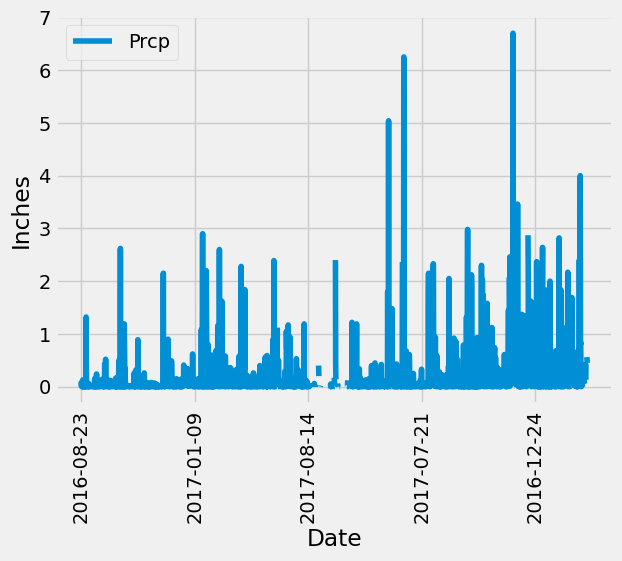

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
measurements_df.plot(y='Prcp',rot=90, ylabel=('Inches'))
xlim=["2016-08-23", "2017-10-15"]

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurements_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

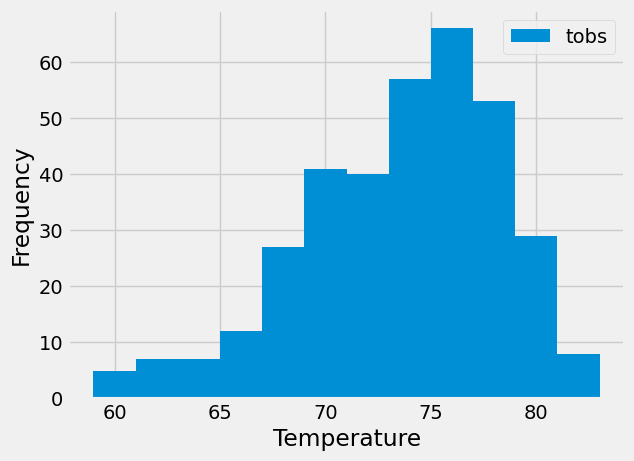

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago_date).all()

temp_df= pd.DataFrame(temp_data)
temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [41]:
# Close Session
session.close()